In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Аппроксимация

## Средствами numpy 

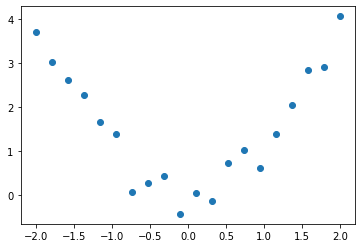

In [2]:
# Создадим тестовые данные - идеальная (без шума) парабола
x = np.linspace(-2, 2, 20)
y = x**2

# Теперь зашумим параболу некоторыми случайными числами от -0.5 до 0.5
# np.random.rand() возвращает случайное число на интервале [0, 1)
noise = np.random.rand(20) - 0.5
y += noise

fig, ax = plt.subplots()

ax.scatter(x, y)

In [3]:
# np.polyfit() - функция, возвращающая оптимальные коэффициенты полинома для аппроксимации зависимости x от y
coefs = np.polyfit(x, y, 2)
coefs

array([0.97385247, 0.01212328, 0.09351086])

In [4]:
# np.poly1d() - удобная штука, превращающая коэффициенты в функцию
p = np.poly1d(coefs)
print(p(1))

1.0794866094489837


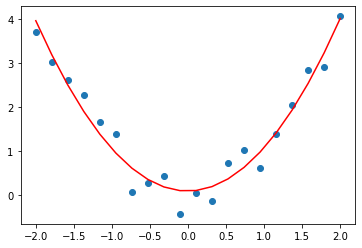

In [5]:
# Построим кривую по этой функции, и посмотрим, как она ляжет на точки

fig2, ax2 = plt.subplots()

ax2.scatter(x, y)
ax2.plot(x, p(x), c='red')

## С помощью scipy 

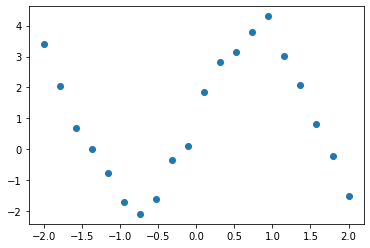

In [6]:
# SciPy - очень большая библиотека для всяких умных штук, но мы рассмотрим только scipy.optimize.curve_fit()
# Она позволяет подогнать точки кастомной функцией, а не только полиномом, 

# Создадим данные посложнее

x = np.linspace(-2, 2, 20)

# Это будет функция, по которой мы будем искать коэффициенты. Она должна быть определенного вида.
# Сначала аргумент, потом параметры
def foo(x, a, b, c):
    return a * np.sin(b * x) + c


noise = np.random.rand(20) - 0.5

y = foo(x, 3, 2, 1) + noise

plt.scatter(x, y)

In [7]:
# Теперь curve_fit
popt, pcov = curve_fit(foo, x, y)
popt

array([2.91059234, 2.00845042, 0.99400891])

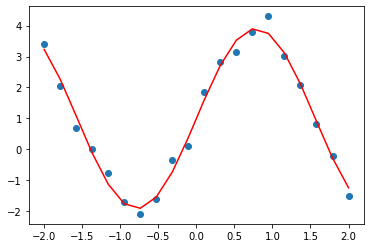

In [8]:
plt.scatter(x, y)
plt.plot(x, foo(x, *popt), c='red')

In [9]:
# Напоминаю, что вот так можно сохранять и читать .txt.
x = np.arange(1, 2, 0.1)
np.savetxt('name.txt', x)

y = np.loadtxt('name.txt')
y

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

# Pandas
## Создание фрейма

In [10]:
# Создаем словарь, чтобы засунуть его в dataframe.

dict = {"A" : [1.1, 2.2, 3.3, 4.4, 5.5, 6.6],
       "B" : [1, 4, 9, 16, "25", 36],
       "C" : [5, 2, 3, np.nan, 1, 4]}

In [11]:
# Так создается data frame - хранилище данных в Pandas

df = pd.DataFrame(dict)
df

,A,B,C
0,1.1,1,5.0
1,2.2,4,2.0
2,3.3,9,3.0
3,4.4,16,NaN
4,5.5,25,1.0
5,6.6,36,4.0


## Сохранение и чтение из файла

In [12]:
# Сохранение в excel таблицу.
df.to_excel("foo.xlsx")
print(pd.read_excel("foo.xlsx"))

# Файл по-умолчанию сохраняется с индексами. Давайте их уберем.
df.to_excel("foo.xlsx", index=False)
print(pd.read_excel("foo.xlsx"))

# Сохранение в csv
df.to_csv("foo.csv", index=False)
print(pd.read_csv("foo.csv"))

   Unnamed: 0    A   B    C
0           0  1.1   1  5.0
1           1  2.2   4  2.0
2           2  3.3   9  3.0
3           3  4.4  16  NaN
4           4  5.5  25  1.0
5           5  6.6  36  4.0
     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
3  4.4  16  NaN
4  5.5  25  1.0
5  6.6  36  4.0
     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
3  4.4  16  NaN
4  5.5  25  1.0
5  6.6  36  4.0


## Просмотр данных 

In [13]:
# Можно посмотреть типы колонок. А - только float, В - мешанина, поэтому просто object.

df.dtypes

A    float64
B     object
C    float64
dtype: object

In [14]:
# Индексы - номера строк. Та колонка, которая рисуется слева при print(df)

df.index

RangeIndex(start=0, stop=6, step=1)

In [15]:
# Так можно посмотреть первые(последние) n строчек. По умолчанию - 5.
print(df.head(2))
print(df.tail())

     A  B    C
0  1.1  1  5.0
1  2.2  4  2.0
     A   B    C
1  2.2   4  2.0
2  3.3   9  3.0
3  4.4  16  NaN
4  5.5  25  1.0
5  6.6  36  4.0


In [16]:
# df.columns возвращает список названий колонок, к которому можно обращаться по индексу.
df.columns[-1]

'C'

In [17]:
# Можно преобразовать df к numpy массиву - получится массив строчек. Удобно, если все значения - числа.
# Обратите внимание, что этот метод не изменяет df, а лишь возвращает измененный.

df.to_numpy()

array([[1.1, 1, 5.0],
       [2.2, 4, 2.0],
       [3.3, 9, 3.0],
       [4.4, 16, nan],
       [5.5, '25', 1.0],
       [6.6, 36, 4.0]], dtype=object)

In [18]:
# Если хочется массив столбцов, можно транспонировать dataframe.
# df.T так же не изменяет df, а возвращает измененный.

df.T

,0,1,2,3,4,5
A,1.1,2.2,3.3,4.4,5.5,6.6
B,1,4,9,16,25,36
C,5.0,2.0,3.0,NaN,1.0,4.0


## Обращение к элементам DF

In [19]:
# Выбор элемента по строке и столбцу. Можно делать срезы. Можно срезом выбрать целую строку или столбец.
df.loc[3:, df.columns[1:]]

,B,C
3,16,NaN
4,25,1.0
5,36,4.0


In [20]:
# Вот так можно использовать bool условия.
df.loc[df['A'] > 4]

,A,B,C
3,4.4,16,NaN
4,5.5,25,1.0
5,6.6,36,4.0


In [21]:
# Есть ещё выбор элемента по индексу. Удобно, чтобы не заморачиваться с названиями столбцов.
df.iloc[3:, 1:]

,B,C
3,16,NaN
4,25,1.0
5,36,4.0


In [22]:
# Можно изменять элементы к которым обращаемся
df.iloc[3:, 1:] = np.zeros((3, 2))
print(df)
print("=================")
df.iloc[3:, 1:] = [[16, np.nan], [25, 1.0], [36, 4.0]]
print(df)

     A    B    C
0  1.1    1  5.0
1  2.2    4  2.0
2  3.3    9  3.0
3  4.4  0.0  0.0
4  5.5  0.0  0.0
5  6.6  0.0  0.0
     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
3  4.4  16  NaN
4  5.5  25  1.0
5  6.6  36  4.0


In [23]:
# Для обращения к одному элементу. Тоже можно изменять
print(df.at[3, "B"])
df.at[3, "B"] *= -1
print(df)
df.at[3, "B"] *= -1

16
     A    B    C
0  1.1    1  5.0
1  2.2    4  2.0
2  3.3    9  3.0
3  4.4  -16  NaN
4  5.5   25  1.0
5  6.6   36  4.0


In [24]:
# Есть обращение к одному элементу по индексу [строка, столбец]
df.iat[1, 2]

2.0

## Уберем NaN

In [25]:
# Бывает такое, что в считываемом файле отсутствуют некоторые элементы таблицы. Они заменяются на NaN.
# Для вычислений они непригодны, поэтому нужно убрать строчки с ними. Вот так:

df.dropna(how="any")

# Аналогично, сам по себе dropna не изменяет фрейм

,A,B,C
0,1.1,1,5.0
1,2.2,4,2.0
2,3.3,9,3.0
4,5.5,25,1.0
5,6.6,36,4.0


In [26]:
# Обратите внимание, что колонка с индексами поменялась. Исчезла тройка.

df.index

RangeIndex(start=0, stop=6, step=1)

In [27]:
# Есть ещё такая штука, может, понадобится. Возвращает bool карту того, где NaN.
print(df)
pd.isna(df)

     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
3  4.4  16  NaN
4  5.5  25  1.0
5  6.6  36  4.0


,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,False


In [28]:
# Теперь мы наконец изменим фрейм, убрав из него все строчки с NaN.
df = df.dropna(how="any")
df

,A,B,C
0,1.1,1,5.0
1,2.2,4,2.0
2,3.3,9,3.0
4,5.5,25,1.0
5,6.6,36,4.0


## Всякие операции c фреймами

In [29]:
# Среднее и сумма.
# Если вам нужно выполнить какую-то тривиальную операцию,
# то, скорее всего, есть метод, делающий ее в одну строчку, погуглите

print(df.mean())
print("===================")
print(df.sum())
print("===================")

# Пример тривиальной операции - сортировка
# Если для объектов в столбце определены операторы сравнения, то можно отсортировать по значению.
# sort_values() не изменяет df, а возвращает измененный.
print(df)
print("===================")
df.sort_values(by="C")

A     3.74
B    15.00
C     3.00
dtype: float64
A    18.7
B      75
C    15.0
dtype: object
     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
4  5.5  25  1.0
5  6.6  36  4.0


,A,B,C
4,5.5,25,1.0
1,2.2,4,2.0
2,3.3,9,3.0
5,6.6,36,4.0
0,1.1,1,5.0


In [30]:
# Из интересного - применение кастомной функции к данным

print(df.apply(np.cumsum))
print("====================")
print(df.apply(lambda x: x.max() - x.min()))
print("====================")


def foo(x):
    return np.sin(x.astype(float))


print(df)
print("====================")
print(df.apply(foo))

      A   B     C
0   1.1   1   5.0
1   3.3   5   7.0
2   6.6  14  10.0
4  12.1  39  11.0
5  18.7  75  15.0
A     5.5
B    35.0
C     4.0
dtype: float64
     A   B    C
0  1.1   1  5.0
1  2.2   4  2.0
2  3.3   9  3.0
4  5.5  25  1.0
5  6.6  36  4.0
          A         B         C
0  0.891207  0.841471 -0.958924
1  0.808496 -0.756802  0.909297
2 -0.157746  0.412118  0.141120
4 -0.705540 -0.132352  0.841471
5  0.311541 -0.991779 -0.756802


## Визуализация

     A      B  C   D
0  foo    one  0   0
1  bar    one  1   1
2  foo    two  2   4
3  bar  three  3   9
4  foo    two  4  16
5  bar    two  5  25
6  foo    one  6  36
7  foo  three  7  49
      C    D
A           
bar   9   35
foo  19  105


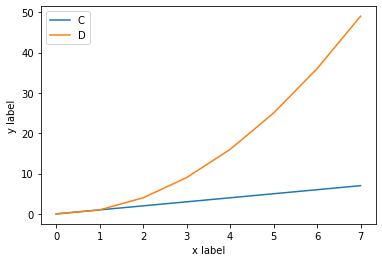

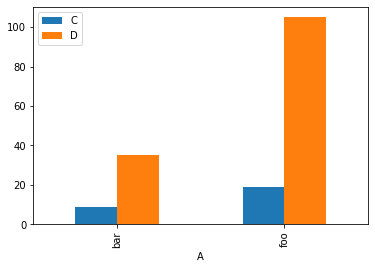

In [31]:
df0 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': [i for i in range(8)],
                   'D': [i**2 for i in range(8)]})

print(df0)

# Можно взять и нарисовать фрейм
ax = df0.plot()
ax.set_xlabel('x label')
ax.set_ylabel('y label')

print("=================")

# А потом посчитать агрегаты
aggr = df0.groupby('A').sum()
print(aggr)

# И их тоже нарисовать
ax2 = aggr.plot(kind='bar')

plt.show()

             a         b         c         d
0    -0.272067  0.212023  0.919623 -0.129467
1     0.541224  0.447915 -0.888232 -2.412034
2     0.681229 -1.604807  1.571853 -1.832158
3    -0.630824  0.473286  0.273587 -0.179214
4    -1.800599  0.052753  0.188338  1.329957
...        ...       ...       ...       ...
9995 -1.379103  1.023914  0.674420 -0.259173
9996  0.533326  0.887162  0.613108 -1.536687
9997  0.401632 -0.416468 -0.914217  1.107653
9998  1.505821 -1.906934 -0.063958 -0.634296
9999  2.455634 -0.631654 -0.857179 -0.555851

[10000 rows x 4 columns]


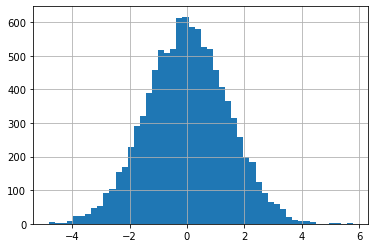

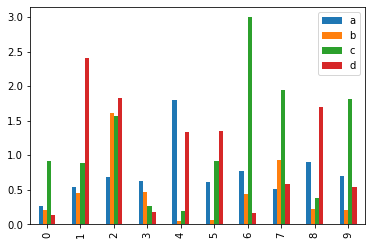

In [32]:
# Cоздадим фрейм из рандомных нормально распределенных значений
df2 = pd.DataFrame(np.random.randn(10000, 4), columns=["a", "b", "c", "d"])

print(df2)

# Построим гистограмму
df2["a"].diff().hist(bins=50);

# И построим столбиками
df2.head(10).abs().plot.bar();